In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[254 254 254 ... 248 248 248]
 [255 255 254 ... 250 248 246]
 [255 255 255 ... 249 248 245]
 ...
 [ 98  96 118 ... 155 179 177]
 [ 88  81  65 ... 130 157 163]
 [ 62  61  44 ... 129 142 137]]


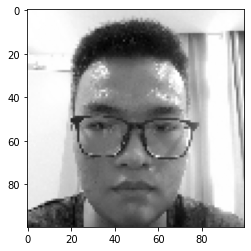

In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 
datadir = "/content/drive/MyDrive/AI/GroupFaceID"
categories=['andong','anhminh','locnguyen']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 30/30 [00:00<00:00, 46.41it/s]

90


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (90, 100, 100, 1)
y (90,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI/GroupFaceID/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI/GroupFaceID/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical
pickle_in = open("/content/drive/MyDrive/AI/GroupFaceID/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI/GroupFaceID/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (90, 100, 100, 1)
y (90,)


In [ ]:
y= to_categorical(y,3)
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
2/2 [==============================] - 13s 977ms/step - loss: 5.2866 - accuracy: 0.3457 - val_loss: 0.0687 - val_accuracy: 1.0000
Epoch 2/30
2/2 [==============================] - 0s 78ms/step - loss: 2.6899 - accuracy: 0.2593 - val_loss: 1.5993 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 78ms/step - loss: 1.0326 - accuracy: 0.4444 - val_loss: 1.7666 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 84ms/step - loss: 0.9421 - accuracy: 0.5062 - val_loss: 1.1551 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 77ms/step - loss: 0.6659 - accuracy: 0.7901 - val_loss: 0.9419 - val_accuracy: 0.5556
Epoch 6/30
2/2 [==============================] - 0s 77ms/step - loss: 0.4528 - accuracy: 0.9506 - val_loss: 0.7254 - val_accuracy: 0.7778
Epoch 7/30
2/2 [==============================] - 0s 78ms/step - loss: 0.2652 - accuracy: 0.9383 - val_loss: 0.1748 - val_accuracy: 1.0000
Epoch 8/30
2/

In [ ]:
model.save('GroupFaceID.h5')

[[0. 0. 1.]]
expectation locnguyen


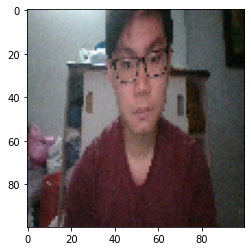

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'andong',
          1: 'anhminh',
          2: 'locnguyen',    
          }
model = load_model('GroupFaceID.h5')
	# load model
img = load_image('loc1.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 1. 0.]]
expectation anhminh


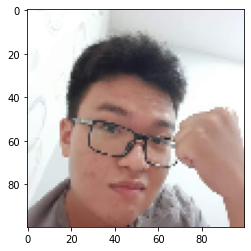

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'andong',
          1: 'anhminh',
          2: 'locnguyen',    
          }
model = load_model('GroupFaceID.h5')
	# load model
img = load_image('dong.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 1.]]
expectation locnguyen


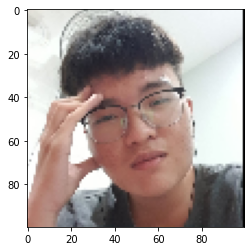

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'andong',
          1: 'anhminh',
          2: 'locnguyen',    
          }
model = load_model('GroupFaceID.h5')
	# load model
img = load_image('dong2.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 1. 0.]]
expectation anhminh


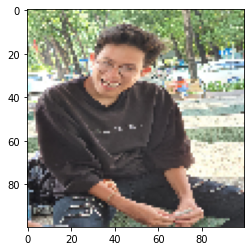

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'andong',
          1: 'anhminh',
          2: 'locnguyen',    
          }
model = load_model('GroupFaceID.h5')
	# load model
img = load_image('minh.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 1.]]
expectation locnguyen


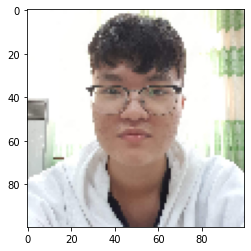

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'andong',
          1: 'anhminh',
          2: 'locnguyen',    
          }
model = load_model('GroupFaceID.h5')
	# load model
img = load_image('dong3.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 